In [36]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

função auxiliar


In [93]:
#remove caracteres nao alfabetics e nao numericos da string

import re

def remover_nao_alfanumericos(texto):
    # Expressão regular para substituir qualquer caractere que não seja alfanumérico por uma string vazia
    return re.sub(r'[^A-Z0-9]', '', texto)

print(remover_nao_alfanumericos("asdasd...da3332sr"))

3332


## Pré-processamento

Converte a imagem para a escala de cinza

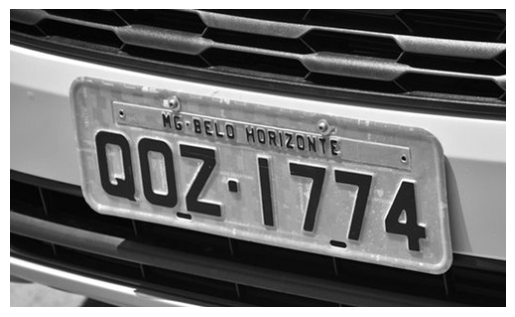

In [37]:
img = cv2.imread("placa2.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.axis("off")  # Opcional: remove os eixos
plt.show()


aplicação do filtro de mediana

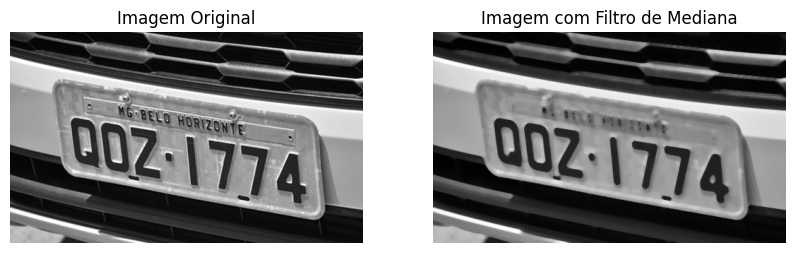

In [38]:
import cv2
import matplotlib.pyplot as plt

# Aplicar o filtro de mediana com um kernel 5x5
imagem_median_blur = cv2.medianBlur(img, 7)

# Exibir a imagem original e a imagem filtrada lado a lado
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Imagem Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(imagem_median_blur, cmap='gray')
plt.title("Imagem com Filtro de Mediana")
plt.axis("off")

plt.show()


Aplica filtro gaussiano para remoção de ruídos

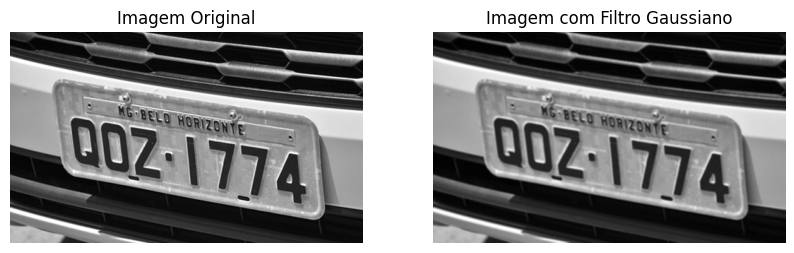

In [39]:
imagem_suavizada = cv2.GaussianBlur(img, (3, 3), 3)

# Exibir a imagem original e a suavizada lado a lado
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Imagem Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(imagem_suavizada, cmap='gray')
plt.title("Imagem com Filtro Gaussiano")
plt.axis("off")

plt.show()

Equaliza o histograma para aumentar o contraste e melhorar a visibilidade dos caracteres.

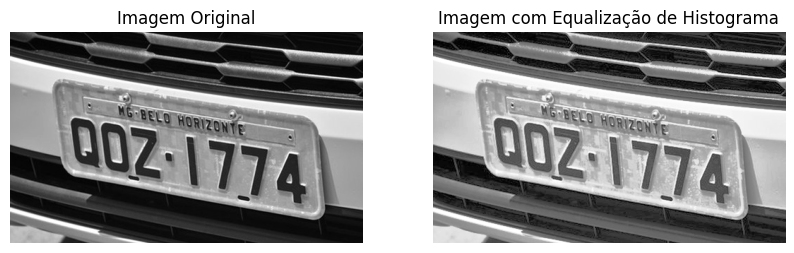

In [40]:
# Aplicar a equalização do histograma
imagem_equalizada = cv2.equalizeHist(img)

# Exibir a imagem original e a equalizada lado a lado
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Imagem Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(imagem_equalizada, cmap='gray')
plt.title("Imagem com Equalização de Histograma")
plt.axis("off")

plt.show()

Detecta as bordas

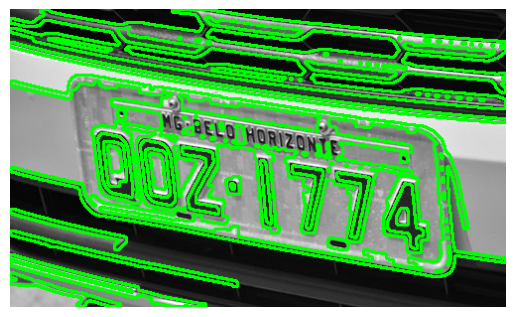

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Detectar as bordas com o algoritmo de Canny
bordas = cv2.Canny(imagem_suavizada, 100, 200)

# Aplicar a dilatação para aumentar a área das bordas
kernel = np.ones((5, 5), np.uint8)  # Define o kernel de dilatação, onde (5, 5) é o tamanho
bordas_dilatadas = cv2.dilate(bordas, kernel, iterations=1)

# Encontrar os contornos na imagem dilatada
contornos, _ = cv2.findContours(bordas_dilatadas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Desenhar os contornos dilatados na imagem original
imagem_colorida = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(imagem_colorida, contornos, -1, (0, 255, 0), 2)

# Exibir a imagem com os contornos dilatados
plt.imshow(cv2.cvtColor(imagem_colorida, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


Extrai caracteres selecionados

In [42]:
# Aproximar o contorno da placa para um quadrilátero com 4 pontos
if len(aproximacao) == 4:
    pts = np.array(aproximacao, dtype='float32')

    # Definir as coordenadas de destino para a transformação de perspectiva (imagem retangular)
    largura = 400  # Ajuste conforme necessário
    altura = 100  # Ajuste conforme necessário
    destino = np.array([
        [0, 0], [largura-1, 0], [largura-1, altura-1], [0, altura-1]
    ], dtype='float32')

    # Obter a matriz de transformação de perspectiva
    matriz_transformacao = cv2.getPerspectiveTransform(pts, destino)

    # Aplicar a transformação de perspectiva
    imagem_plano = cv2.warpPerspective(imagem_colorida, matriz_transformacao, (largura, altura))
    
    # Exibir a imagem com a placa alinhada
    plt.imshow(cv2.cvtColor(imagem_plano, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()


NameError: name 'aproximacao' is not defined

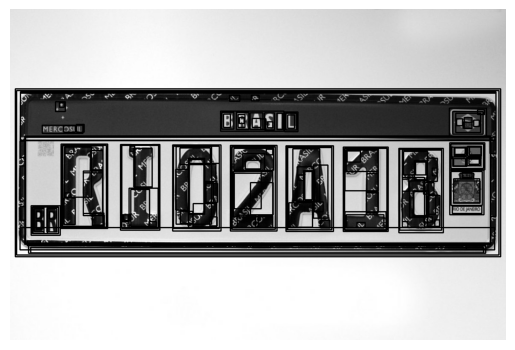

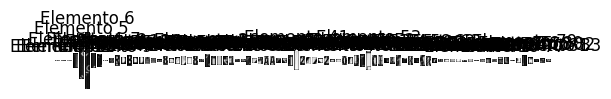

In [ ]:

img_suavizada = cv2.medianBlur(img, 7)

# Detectar as bordas com o algoritmo de Canny
bordas = cv2.Canny(img_suavizada, 100, 200)

# Aplicar a dilatação para aumentar a área das bordas
kernel = np.ones((5, 5), np.uint8)  # Define o kernel de dilatação
bordas_dilatadas = cv2.dilate(bordas, kernel, iterations=1)

# Encontrar os contornos na img dilatada
contornos, _ = cv2.findContours(bordas_dilatadas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Lista para armazenar as regiões extraídas
elementos_extraidos = []

# Filtrar e extrair os elementos detectados
for contorno in contornos:
    # Calcular o retângulo delimitador para cada contorno
    x, y, w, h = cv2.boundingRect(contorno)

    # Filtrar contornos com base no tamanho (ajuste conforme necessário)
    if w > 10 and h > 10:  # Limite mínimo para considerar como caractere ou elemento relevante
        # Extrair a região do elemento da img original
        elemento = img[y:y+h, x:x+w]
        elementos_extraidos.append(elemento)

        # Desenhar um retângulo ao redor da região do elemento
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Exibir a img com os elementos destacados
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# Exibir ou salvar os elementos extraídos (caracteres)
for idx, elemento in enumerate(elementos_extraidos):
    plt.subplot(1, len(elementos_extraidos), idx + 1)
    plt.imshow(elemento, cmap='gray')
    plt.axis('off')
    plt.title(f"Elemento {idx + 1}")
plt.show()

# Salvar cada elemento extraído em arquivos separados (opcional)
for idx, elemento in enumerate(elementos_extraidos):
    cv2.imwrite(f"elemento_{idx + 1}.jpg", elemento)


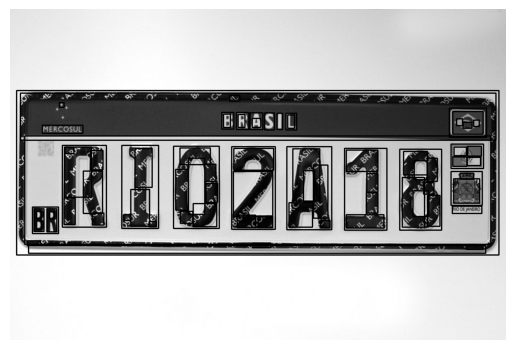

Caractere 1: LOZA1B8
Caractere 2: eS es Se
Caractere 3: =a
Caractere 4: a
Caractere 5: a
Caractere 6: wiLOZaige
Caractere 7: BR
Caractere 8: R
Caractere 9: 
Caractere 10: i
Caractere 11: 5
Caractere 12: J
Caractere 13: PO DE JANEIRO
Caractere 14: Pa
Caractere 15: oR
Caractere 16: Ez
Caractere 17: 4
Caractere 18: c
Caractere 19: |
Caractere 20: -
Caractere 21: [
Caractere 22: a
Caractere 23: e
Caractere 24: a
Caractere 25: ‘|
Caractere 26: ner.
Caractere 27: in
Caractere 28: -
Caractere 29: Ws
Caractere 30: hh
Caractere 31: -
Caractere 32: ao
Caractere 33: |
Caractere 34: ;
Caractere 35: f
Caractere 36: 7
Caractere 37: an
Caractere 38: aa
Caractere 39: 4
Caractere 40: re
Caractere 41: a
Caractere 42: -
Caractere 43: e
Caractere 44: _
Caractere 45: :
Caractere 46: rm
Caractere 47: i
Caractere 48: ri
Caractere 49: }
Caractere 50: oll
Caractere 51: as
Caractere 52: ¢
Caractere 53: :
Caractere 54: if
Caractere 55: a
Caractere 56: c
Caractere 57: x
Caractere 58: "
Caractere 59: f
Caractere 6

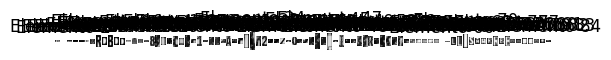

In [ ]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem em escala de cinza
# imagem = cv2.imread("placa.jpeg", cv2.IMREAD_GRAYSCALE)
imagem = imagem_erosionada
# Suavizar a imagem para reduzir ruídos
imagem_suavizada = cv2.GaussianBlur(imagem, (5, 5), 0)

# Detectar as bordas com o algoritmo de Canny
bordas = cv2.Canny(imagem_suavizada, 100, 200)

# Aplicar a dilatação para aumentar a área das bordas
kernel = np.ones((5, 5), np.uint8)  # Define o kernel de dilatação
bordas_dilatadas = cv2.dilate(bordas, kernel, iterations=1)

# Encontrar os contornos na imagem dilatada
contornos, _ = cv2.findContours(bordas_dilatadas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Lista para armazenar os elementos extraídos
elementos_extraidos = []

# Filtrar e extrair os elementos detectados
for contorno in contornos:
    # Calcular o retângulo delimitador para cada contorno
    x, y, w, h = cv2.boundingRect(contorno)

    # Filtrar contornos com base no tamanho (ajuste conforme necessário)
    if w > 10 and h > 10:  # Limite mínimo para considerar como caractere
        # Extrair a região do elemento da imagem original
        elemento = imagem[y:y+h, x:x+w]
        elementos_extraidos.append(elemento)

        # Desenhar um retângulo ao redor da região do elemento
        cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Exibir a imagem com os elementos destacados
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# Identificar os caracteres extraídos usando o Tesseract OCR
for idx, elemento in enumerate(elementos_extraidos):
    # Aplicar thresholding para melhorar o contraste (opcional)
    _, elemento_bin = cv2.threshold(elemento, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Utilizar o Tesseract para identificar o caractere
    texto_detectado = pytesseract.image_to_string(elemento_bin, config='--psm 10')  # psm=10 para uma única linha de texto
    
    print(f"Caractere {idx + 1}: {texto_detectado.strip()}")

# Exibir os elementos extraídos (opcional)
for idx, elemento in enumerate(elementos_extraidos):
    plt.subplot(1, len(elementos_extraidos), idx + 1)
    plt.imshow(elemento, cmap='gray')
    plt.axis('off')
    plt.title(f"Elemento {idx + 1}")
plt.show()


Testando a dilatação

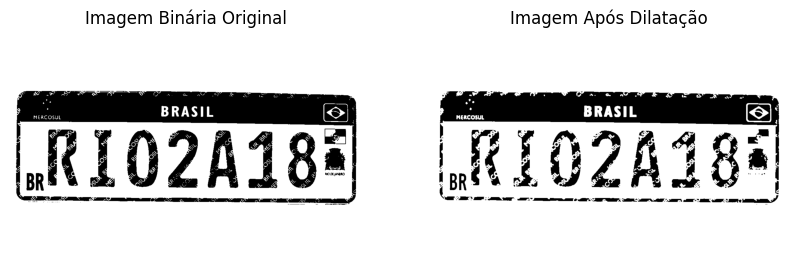

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem em escala de cinza
imagem = cv2.imread("placa.jpeg", cv2.IMREAD_GRAYSCALE)

# Aplicar a binarização para criar uma imagem binária (preto e branco)
_, imagem_binaria = cv2.threshold(imagem, 128, 255, cv2.THRESH_BINARY)

# Definir o kernel para a dilatação (ajuste o tamanho conforme necessário)
kernel = np.ones((3, 3), np.uint8)  # Tamanho de 3x3 é um bom ponto de partida

# Aplicar a dilatação
imagem_dilatada = cv2.dilate(imagem_binaria, kernel, iterations=1)

# Exibir a imagem antes e depois da dilatação
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagem Binária Original")
plt.imshow(imagem_binaria, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Imagem Após Dilatação")
plt.imshow(imagem_dilatada, cmap="gray")
plt.axis("off")

plt.show()


testando a erosão para tirar os escritos brancos

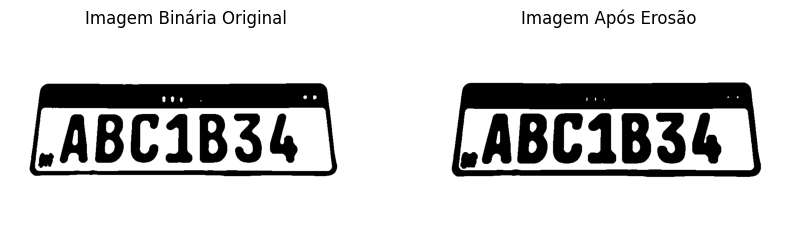

In [107]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Carregar a imagem em escala de cinza
imagem = cv2.imread("placa5.webp", cv2.IMREAD_GRAYSCALE)
# suavização de mediana
imagem_com_blur = cv2.medianBlur(imagem, 13)
# Aplicar a binarização para criar uma imagem binária (preto e branco)
# Inverte para que o fundo seja branco (255) e o texto seja preto (0)
_, imagem_binaria = cv2.threshold(imagem_com_blur, 128, 255, cv2.THRESH_BINARY_INV)

# Inverter as cores
imagem_binaria = cv2.bitwise_not(imagem_binaria)

# Definir o kernel para a erosão (ajuste o tamanho conforme necessário)
kernel = np.ones((5, 5), np.uint8)  # Tamanho de 3x3 é um bom ponto de partida

# Aplicar a erosão
imagem_erosionada = cv2.erode(imagem_binaria, kernel, iterations=1)

# # Aplicar a dilatação
# imagem_dilatada = cv2.dilate(imagem_binaria, kernel, iterations=1)

# Exibir a imagem antes e depois da erosão
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagem Binária Original")
plt.imshow(imagem_binaria, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Imagem Após Erosão")
plt.imshow(imagem_erosionada, cmap="gray")
plt.axis("off")

plt.show()


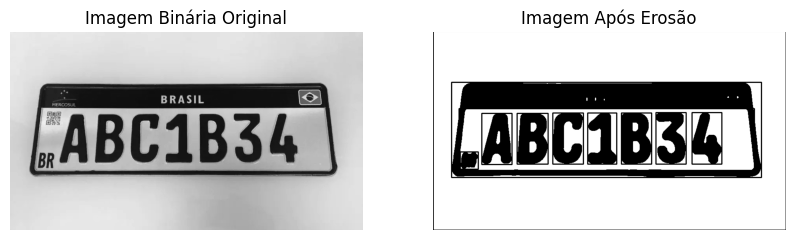

ABC1B34


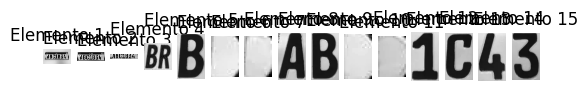

In [108]:
# imagem = imagem_binaria
# imagem_suavizada = cv2.GaussianBlur(imagem, (5, 5), 0)
# imagem_suavizada = cv2.bitwise_not(imagem_suavizada)
# # Detectar as bordas com o algoritmo de Canny
# bordas = cv2.Canny(imagem_suavizada, 100, 200)

# # Aplicar a dilatação para aumentar a área das bordas
# kernel = np.ones((5, 5), np.uint8)  # Define o kernel de dilatação
# bordas_dilatadas = cv2.dilate(bordas, kernel, iterations=1)


# Encontrar os contornos na imagem dilatada
contornos, _ = cv2.findContours(imagem_erosionada, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Lista para armazenar os elementos extraídos
elementos_extraidos = []

# Filtrar e extrair os elementos detectados
for contorno in contornos:
    # Calcular o retângulo delimitador para cada contorno
    x, y, w, h = cv2.boundingRect(contorno)

    # Filtrar contornos com base no tamanho (ajuste conforme necessário)
    if w > 10 and h > 10:  # Limite mínimo para considerar como caractere
        # Extrair a região do elemento da imagem original
        elemento = imagem[y:y+h, x:x+w]
        elementos_extraidos.append(elemento)

        # Desenhar um retângulo ao redor da região do elemento
        cv2.rectangle(imagem_erosionada, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Exibir a imagem antes e depois da erosão
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagem Binária Original")
plt.imshow(imagem, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Imagem Após Erosão")
plt.imshow(imagem_erosionada, cmap="gray")
plt.axis("off")

# Exibir a imagem com os elementos destacados
plt.imshow(cv2.cvtColor(imagem_erosionada, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

texto_importane = ""
# Identificar os caracteres extraídos usando o Tesseract OCR
for idx, elemento in enumerate(elementos_extraidos):
    # Aplicar thresholding para melhorar o contraste (opcional)
    _, elemento_bin = cv2.threshold(elemento, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Utilizar o Tesseract para identificar o caractere
    texto_detectado = pytesseract.image_to_string(elemento_bin, config='--psm 10')  # psm=10 para uma única linha de texto
    if(len(texto_detectado)>4):
        texto_importane=(texto_detectado)
        break
    # print(f"Caractere {idx + 1}: {texto_detectado.strip()}")

texto = remover_nao_alfanumericos(texto_importane)
print(texto)
# Exibir os elementos extraídos (opcional)
for idx, elemento in enumerate(elementos_extraidos):
    plt.subplot(1, len(elementos_extraidos), idx + 1)
    plt.imshow(elemento, cmap='gray')
    plt.axis('off')
    plt.title(f"Elemento {idx + 1}")
plt.show()


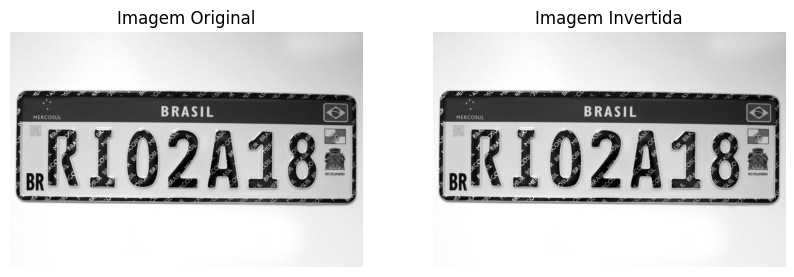

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Carregar a imagem em escala de cinza
imagem = cv2.imread("placa.jpeg", cv2.IMREAD_GRAYSCALE)

# Inverter as cores
imagem_invertida = cv2.bitwise_not(imagem)
imagem_invertida = cv2.bitwise_not(imagem_invertida)
# Exibir a imagem original e a imagem invertida
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagem Original")
plt.imshow(imagem, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Imagem Invertida")
plt.imshow(imagem_invertida, cmap="gray")
plt.axis("off")

plt.show()


teste de arrumar o angulo da imagem

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem em escala de cinza
imagem = cv2.imread("placa2.jpg", cv2.IMREAD_GRAYSCALE)

# Aplicar suavização e detecção de bordas
imagem_suavizada = cv2.GaussianBlur(imagem, (5, 5), 0)
bordas = cv2.Canny(imagem_suavizada, 100, 200)

# Encontrar os contornos na imagem binária
contornos, _ = cv2.findContours(bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Procurar o contorno que se parece com a placa
for contorno in contornos:
    # Aproximação do contorno para encontrar uma forma retangular
    epsilon = 0.02 * cv2.arcLength(contorno, True)
    contorno_aprox = cv2.approxPolyDP(contorno, epsilon, True)
    
    # Se o contorno tem 4 lados, é um possível retângulo (placa)
    if len(contorno_aprox) == 4:
        # Encontrar as coordenadas do retângulo
        x, y, w, h = cv2.boundingRect(contorno_aprox)
        
        # Definir uma área interna menor
        margem = 10  # Margem interna
        x_interno = max(0, x + margem)
        y_interno = max(0, y + margem)
        w_interno = max(0, w - 2 * margem)
        h_interno = max(0, h - 2 * margem)
        
        # Verifique se as dimensões internas são válidas
        if w_interno > 0 and h_interno > 0:
            # Recortar a área interna da placa
            area_interna = imagem[y_interno:y_interno + h_interno, x_interno:x_interno + w_interno]
            
            # Exibir a área interna recortada
            plt.imshow(area_interna, cmap="gray")
            plt.axis("off")
            plt.show()
        
        # Parar após encontrar a primeira placa (opcional)
        break


correção do angulo da placa

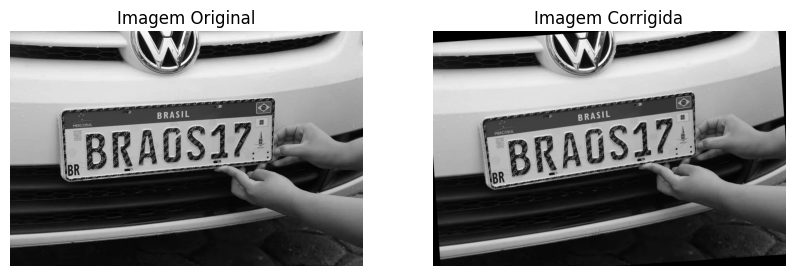

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem em escala de cinza
imagem = cv2.imread("placa3.webp", cv2.IMREAD_GRAYSCALE)

# Aplicar suavização para reduzir ruídos e melhorar a detecção de bordas
imagem_suavizada = cv2.GaussianBlur(imagem, (5, 5), 0)
bordas = cv2.Canny(imagem_suavizada, 100, 200)

# Encontrar os contornos na imagem
contornos, _ = cv2.findContours(bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Variável para armazenar a imagem corrigida
imagem_corrigida = None

# Procurar o contorno da placa
for contorno in contornos:
    # Aproximar um contorno para um retângulo
    epsilon = 0.02 * cv2.arcLength(contorno, True)
    contorno_aprox = cv2.approxPolyDP(contorno, epsilon, True)
    
    # Verificar se o contorno se parece com um retângulo
    if len(contorno_aprox) == 4:
        # Ajustar o retângulo mínimo ao contorno
        retangulo = cv2.minAreaRect(contorno)
        (x, y), (w, h), angulo = retangulo
        
        # Ajuste do ângulo para garantir uma rotação correta
        if angulo < -45:
            angulo += 90

        # Gerar a matriz de rotação
        (h_img, w_img) = imagem.shape[:2]
        centro = (w_img // 2, h_img // 2)
        matriz_rotacao = cv2.getRotationMatrix2D(centro, angulo, 1.0)

        # Aplicar a rotação para corrigir o ângulo
        imagem_corrigida = cv2.warpAffine(imagem, matriz_rotacao, (w_img, h_img))
        
        # Parar após encontrar e corrigir o primeiro contorno de placa
        break

# Exibir a imagem original e a imagem corrigida lado a lado
plt.figure(figsize=(10, 5))

# Plotar a imagem original
plt.subplot(1, 2, 1)
plt.imshow(imagem, cmap="gray")
plt.title("Imagem Original")
plt.axis("off")

# Plotar a imagem corrigida, se disponível
if imagem_corrigida is not None:
    plt.subplot(1, 2, 2)
    plt.imshow(imagem_corrigida, cmap="gray")
    plt.title("Imagem Corrigida")
    plt.axis("off")

plt.show()
